# Avocado Prices

### Historical data on avocado prices and sales volume in multiple US markets

## Problem Statement:

Given some avocados sales features of previous year, the goals is to forcast the price of the avocado for the next year.

## Data

The data contains actual retail sales of the Hass avocados across multiple U.S market

## Data description:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import date
import warnings 
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly


## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
# Getting info about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
# Finding the shape of the data
df.shape

(18249, 14)

In [6]:
# Checking whether there is any missing values or not
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
# Describing the Data
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

## Feature Engineering

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['month'] = [d.strftime('%b') for d in df.Date]
df['month'] = df['month'].replace({'01': 'January', '02': 'February', '03': 'Mars', '04': 'April', '05': 'May', '06': '', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December',})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [11]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region month  
0  Albany   Dec  
1  Albany   Dec  
2  Albany   Dec  
3  Albany   Dec  
4  Albany   Nov

# Data Visualizations

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

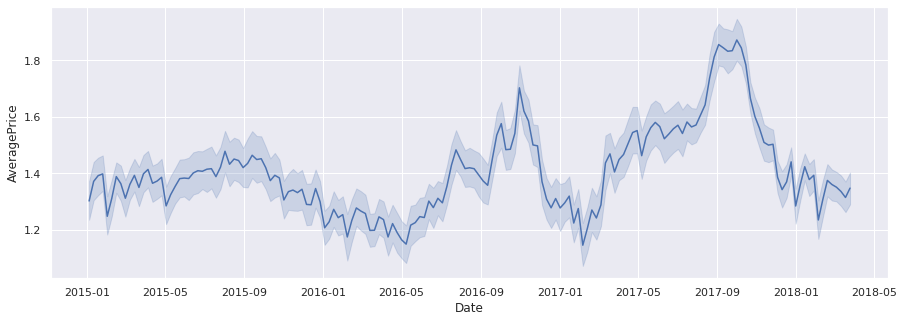

In [13]:
sns.set(rc={'figure.figsize': (15,5)})
sns.lineplot(x= 'Date', y='AveragePrice', data=df)

average price according to the date

<AxesSubplot:xlabel='Date', ylabel='Total Volume'>

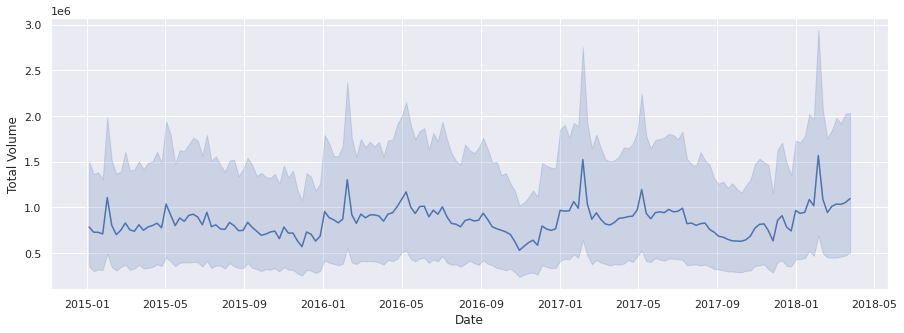

In [14]:
sns.lineplot(x= 'Date', y='Total Volume', data=df)

The total volume of avocados sold at specifics date

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

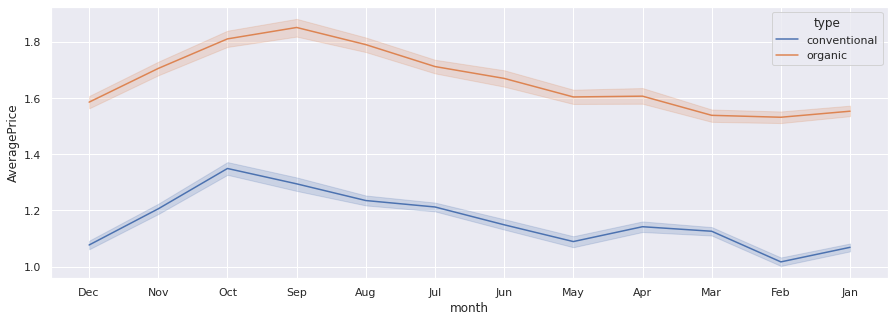

In [17]:
sns.lineplot(x= 'month', y='AveragePrice', hue='type', data=df)

the 2 types of avocados average price throughout the year 

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

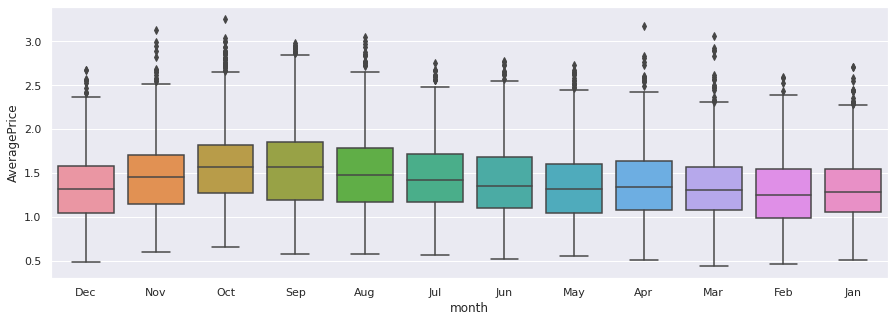

In [18]:
sns.boxplot(x='month', y='AveragePrice', data=df)

Average price throughout the year of all regions for both type of avocados

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

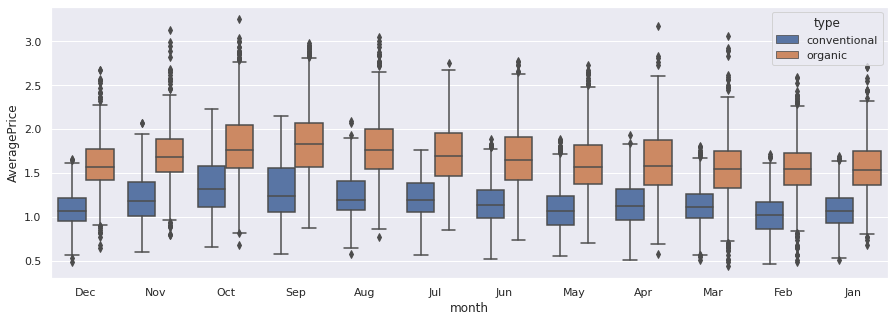

In [19]:
sns.boxplot(x='month', y='AveragePrice', hue="type", data=df)

split the boxes into avocados type

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

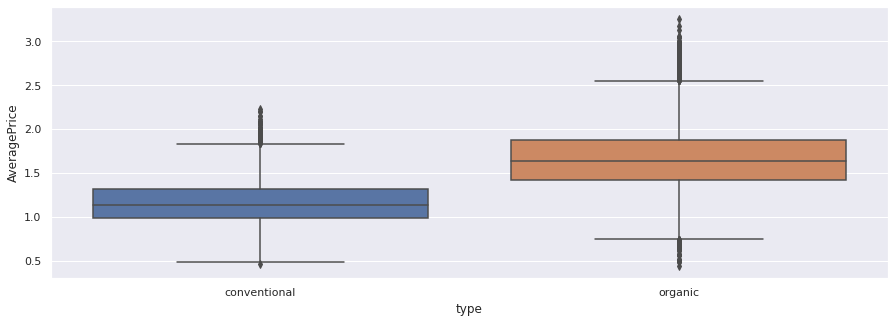

In [20]:
sns.boxplot(x='type', y='AveragePrice', data=df)

Overall average price for both type of avocados

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

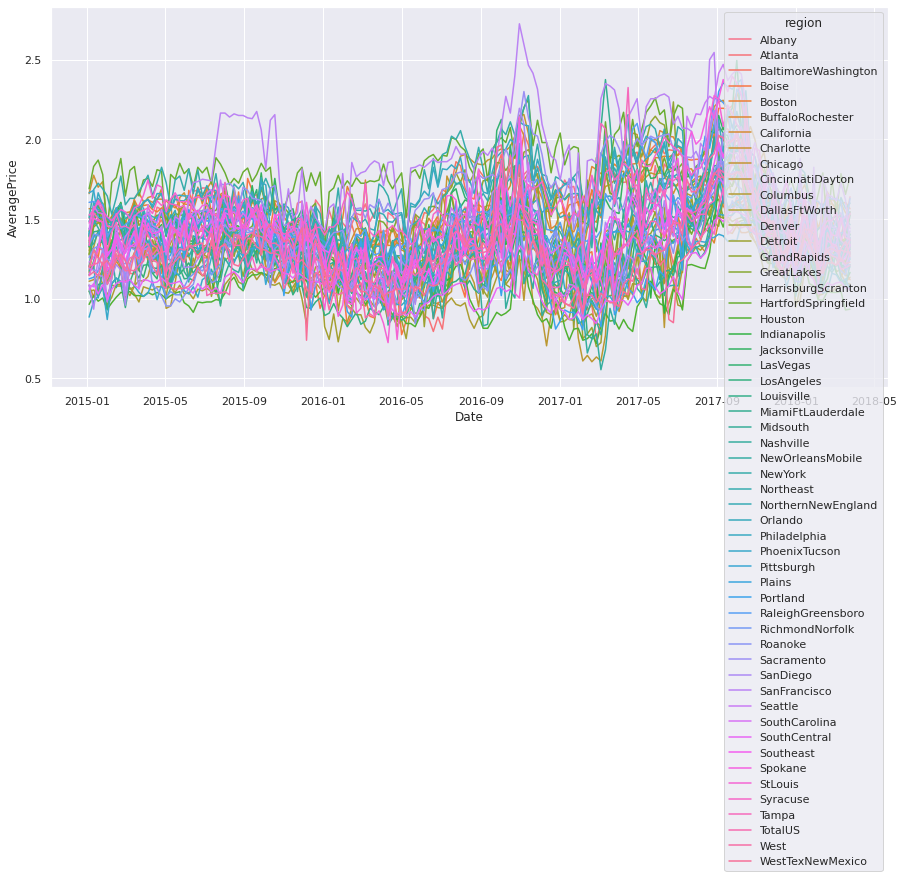

In [23]:
sns.set(rc={'figure.figsize': (15,7)})
sns.lineplot(x= 'Date', y='AveragePrice', hue="region", data=df, ci=None)

Average price for each region separetely

<AxesSubplot:xlabel='Date', ylabel='Total Volume'>

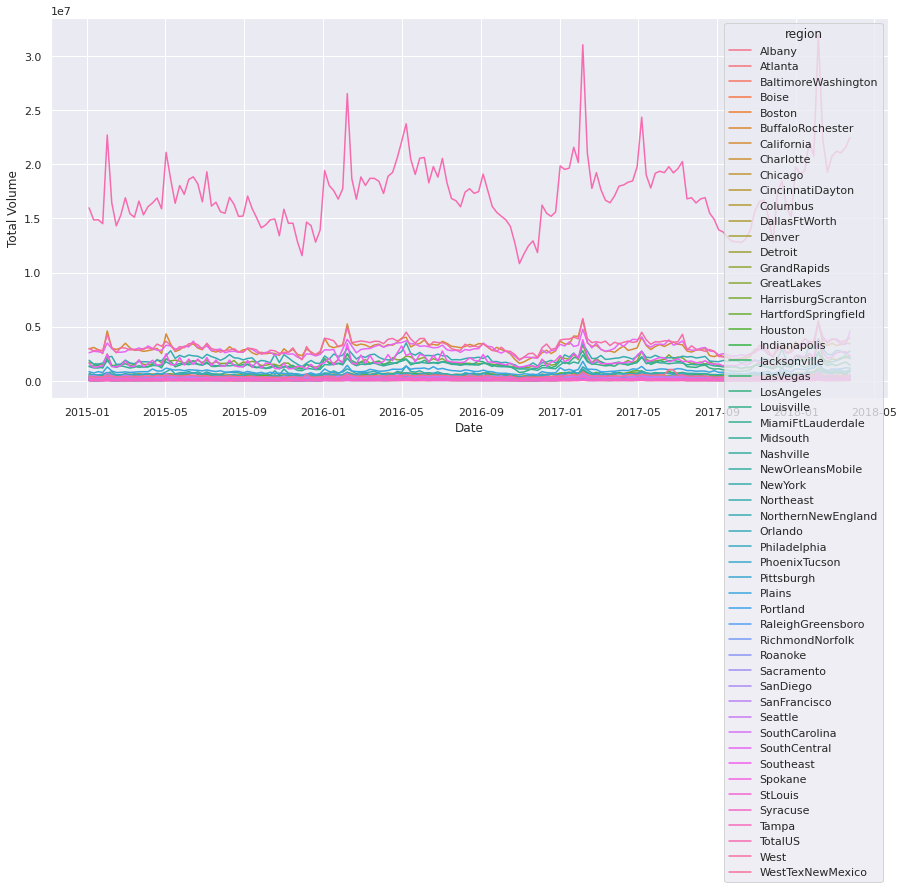

In [24]:
sns.lineplot(x= 'Date', y='Total Volume', hue="region", data=df, ci=None)

Total volume of avocados sold per region

<AxesSubplot:xlabel='Date', ylabel='Total Bags'>

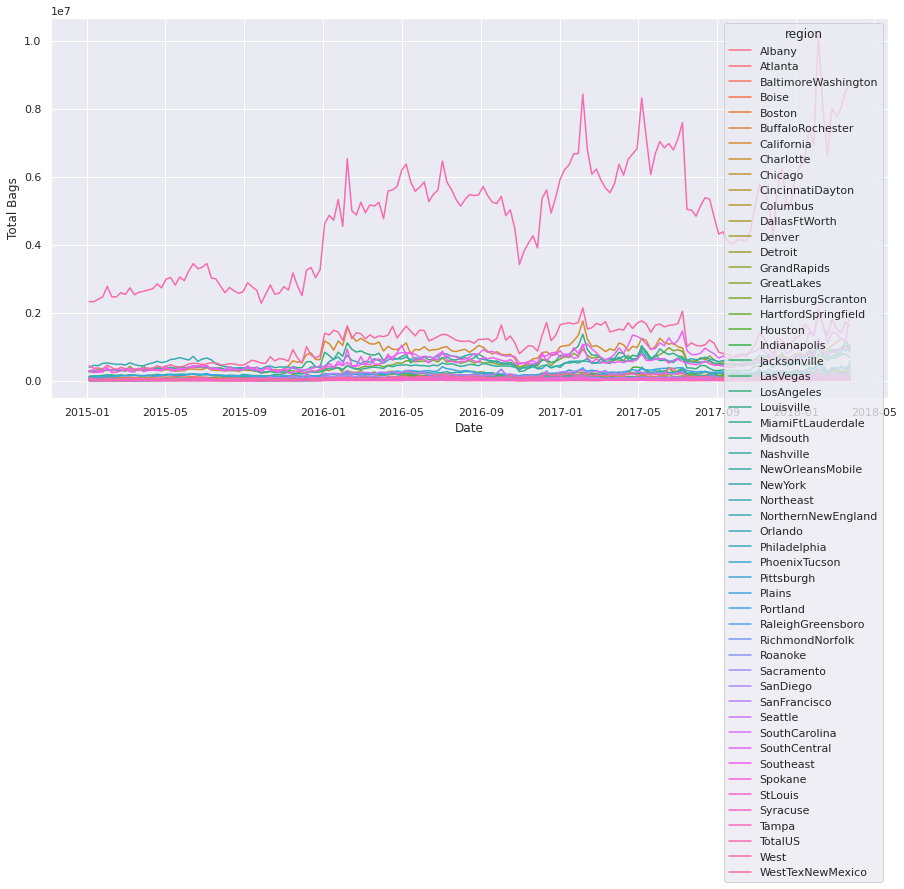

In [25]:
sns.lineplot(x= 'Date', y='Total Bags', hue="region", data=df, ci=None)

### Region-Wise Data Analysis

In [26]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [27]:
df.region.nunique()

54

In [28]:
region_df = df.groupby(['region']).agg({
    'Total Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum',
    'Small Bags': 'sum',
    'Total Volume': 'sum',
})

region_df['Total Bags'] = region_df['Total Bags'].astype('int64')
region_df['Large Bags'] = region_df['Total Bags'].astype('int64')
region_df['XLarge Bags'] = region_df['Total Bags'].astype('int64')
region_df['Small Bags'] = region_df['Total Bags'].astype('int64')
region_df['Total Volume'] = region_df['Total Bags'].astype('int64')
region_df.head()

Total Bags  Large Bags  XLarge Bags  Small Bags  \
region                                                                 
Albany                  2680254     2680254      2680254     2680254   
Atlanta                28560513    28560513     28560513    28560513   
BaltimoreWashington    35306146    35306146     35306146    35306146   
Boise                   5399412     5399412      5399412     5399412   
Boston                 21495476    21495476     21495476    21495476   

                     Total Volume  
region                             
Albany                    2680254  
Atlanta                  28560513  
BaltimoreWashington      35306146  
Boise                     5399412  
Boston                   21495476

In [29]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Albany to WestTexNewMexico
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Total Bags    54 non-null     int64
 1   Large Bags    54 non-null     int64
 2   XLarge Bags   54 non-null     int64
 3   Small Bags    54 non-null     int64
 4   Total Volume  54 non-null     int64
dtypes: int64(5)
memory usage: 5.0+ KB


## Forcasting Average Price for next year using Facebook Prophet

In [32]:
data=df[['AveragePrice', "Date"]].copy()
data.rename(columns={'Date': 'ds', 'AveragePrice':'y'}, inplace=True)
data.sort_values('ds', inplace=True)
data.head()

y         ds
11569  1.75 2015-01-04
9593   1.49 2015-01-04
10009  1.68 2015-01-04
1819   1.52 2015-01-04
9333   1.64 2015-01-04

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       18249 non-null  float64       
 1   ds      18249 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


<AxesSubplot:xlabel='ds', ylabel='y'>

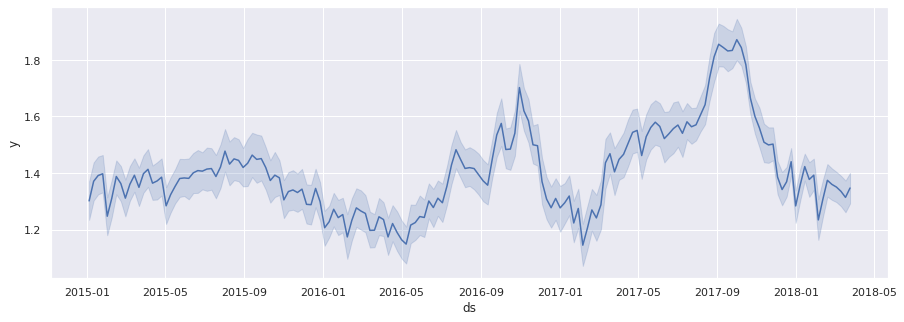

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x= 'ds', y='y', data=data)

In [36]:
data.ds.max()

Timestamp('2018-03-25 00:00:00')

In [37]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


forcasting the price of avocados for the next year in all regions

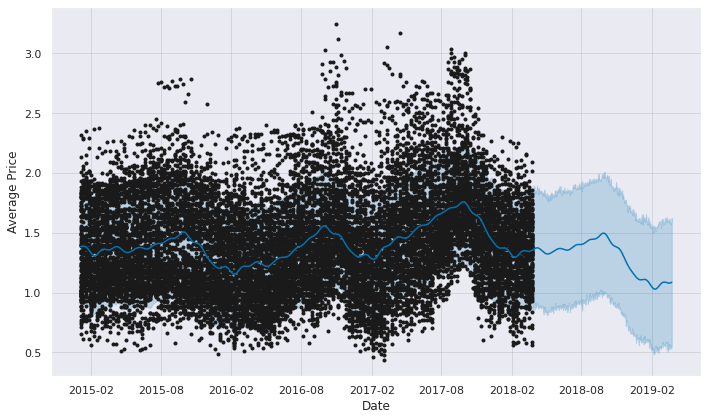

In [38]:
figure = m.plot(forcast, xlabel='Date', ylabel='Average Price')